# Exploratory Data Analysis
From this point all data is taken from already pre-processed, cleaned datasets.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df_art = pd.read_csv('data/cleaned_articles.csv')
df_rep = pd.read_csv('data/cleaned_chosen_representatives.csv')

df_art["title"].value_counts().head(10)
df_rep

,Unnamed: 0,state,party,district,name,committee,page_link
0,0,Alabama,D,7th,"Sewell, Terri",Armed Services|House Administration|Joint Comm...,https://sewell.house.gov/
1,1,Alabama,R,1st,"Carl, Jerry",Appropriations|Natural Resources,https://carl.house.gov
2,2,Alaska,D,At Large,"Peltola, Mary",Natural Resources|Transportation and Infrastru...,https://peltola.house.gov
3,3,American Samoa,R,Delegate,"Radewagen, Aumua Amata",Foreign Affairs|Natural Resources|Veterans' Af...,https://radewagen.house.gov
4,4,Arizona,D,3rd,"Gallego, Ruben",Armed Services|Natural Resources,https://rubengallego.house.gov/
...,...,...,...,...,...,...,...
80,80,Washington,R,4th,"Newhouse, Dan",Appropriations|Select Comm on the Strategic Co...,https://newhouse.house.gov
81,81,West Virginia,R,1st,"Miller, Carol",Ways and Means,https://miller.house.gov/
82,82,Wisconsin,D,2nd,"Pocan, Mark",Appropriations,https://pocan.house.gov
83,83,Wisconsin,R,1st,"Steil, Bryan",Financial Services|House Administration|Joint ...,https://steil.house.gov


In [52]:
rep_to_party = dict(zip(df_rep["name"], df_rep["party"]))

title_counts = df_art["title"].value_counts()
representative_counts = df_art["representative_name"].value_counts()

topics_per_article_counts = pd.DataFrame({
    "title": title_counts.index,
    "count": title_counts.values
}).merge(df_art[['title', 'representative_name']].drop_duplicates(), on='title', how='left')

topics_per_article_counts.rename(columns={"representative_name": "representative"}, inplace=True)

topics_per_article_counts["party"] = [rep_to_party[rep] for rep in topics_per_article_counts["representative"]]
topics_per_article_counts.sort_values(by="representative", key=lambda col: representative_counts[col], inplace=True, ascending=False)
topics_per_article_counts["representative"] = topics_per_article_counts["representative"].apply(lambda x: x + f'({representative_counts[x]})')
topics_per_article_counts

,title,count,representative,party
701,ADVISORY: HHS ANNOUNCES OVER $3 BILLION IN FUN...,3,"Bishop, Sanford(2412)",D
1720,"CONGRESSMAN BISHOP ANNOUNCES $395,400 GRANT FO...",2,"Bishop, Sanford(2412)",D
828,CONGRESSMAN BISHOP SUPPORTS FY23 FUNDING BILL ...,3,"Bishop, Sanford(2412)",D
827,CONGRESSMAN BISHOP SUPPORTS IRAN WAR POWERS RE...,3,"Bishop, Sanford(2412)",D
1722,"Palazzo, Bishop, Ashford Introduce Small Publi...",2,"Bishop, Sanford(2412)",D
...,...,...,...,...
1253,Congressman Matt Gaetz Applauds President Trum...,2,"Gaetz, Matt(79)",R
1440,"Gaetz, Rubio Ask Navy To Prioritize Funding Fo...",2,"Gaetz, Matt(79)",R
1420,Congressman Matt Gaetz Introduces “PANDEMIC Ac...,2,"Gaetz, Matt(79)",R
1348,Rep. Gaetz Joins House Judiciary Colleagues in...,2,"Gaetz, Matt(79)",R


In [53]:
def describe_axis(ax, title, xlabel, ylabel):
    ax.set_title(title, size=18)
    ax.set_xlabel(xlabel, size=14)
    ax.set_ylabel(ylabel, size=14)

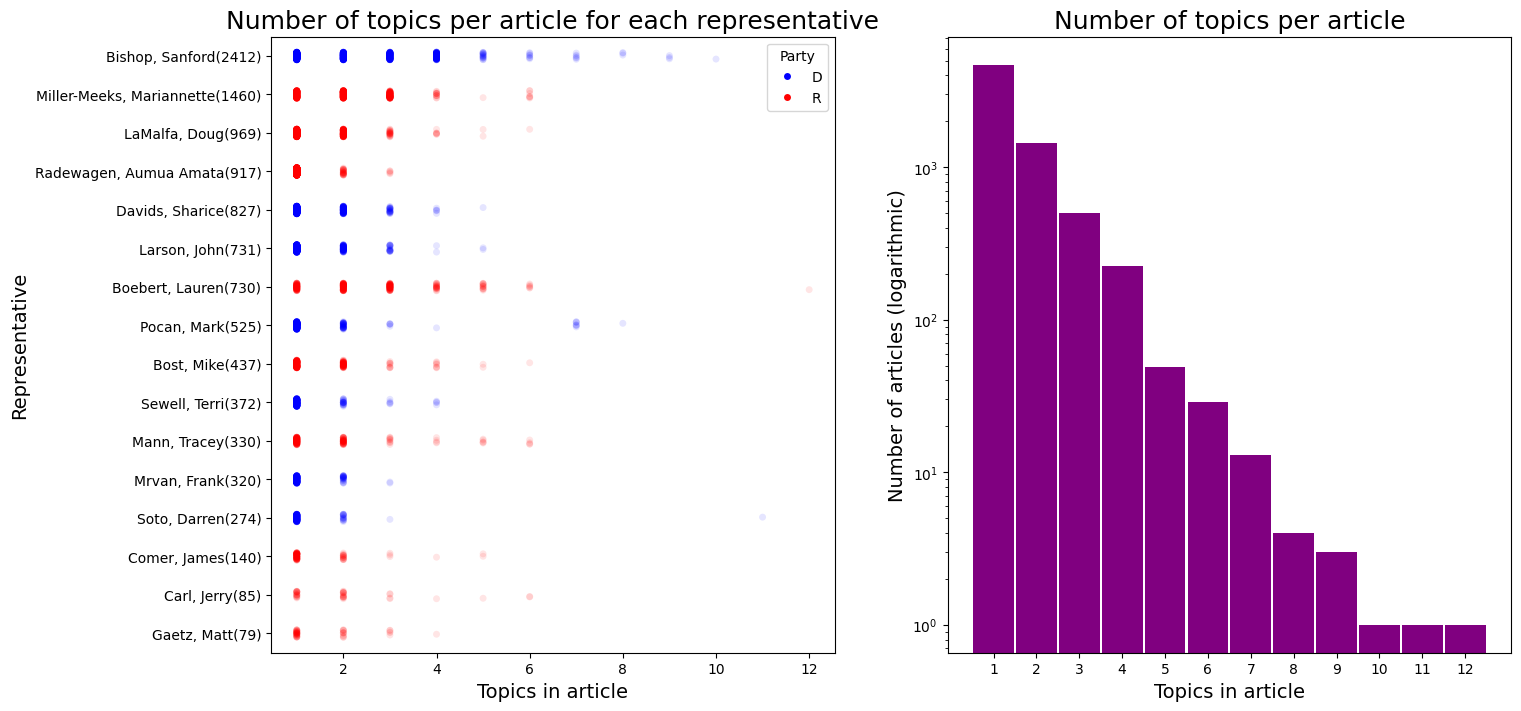

In [56]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(16,8), facecolor="white")

palette = {"D": "blue", "R": "red"}
sns.stripplot(x="count", y="representative", data=topics_per_article_counts, ax=ax[0], jitter=True, alpha=0.1, hue="party", palette=palette)
describe_axis(ax[0], "Number of topics per article for each representative", "Topics in article", "Representative")

# Override alpha for legend
handles, labels = ax[0].get_legend_handles_labels()
for handle in handles:
    handle.set_alpha(1)
ax[0].legend(handles=handles, labels=labels, title="Party")



ax[1].hist(title_counts.values, color="purple", bins = 12, log=True, rwidth=0.95)
describe_axis(ax[1], "Number of topics per article", "Topics in article", "Number of articles (logarithmic)")

#Override x-axis ticks behaviour
bin_edges = ax[1].patches
bin_centers = [patch.get_x() + patch.get_width() / 2 for patch in bin_edges]
ax[1].set_xticks(bin_centers)
ax[1].set_xticklabels(list(range(1, title_counts.max() + 1)));
